# 10 Grafiken zur Vorschau auf die Bundesliga (Value of Transfers)

**1 Graph of total market value of the Bundesliga**

**5 Graphs on players **

- Graphs of new vs. old players. (1) Games, (2) Age, (3) Goals, (4) Assists, (5) Height.

** 2 Graphs on Shoes **

- Graph by number of games of transfers
- Graph of number of goals scored

**2 Graphs on Most Active Agents **

- Graph by amount of players
- Graph by amount of player value

Source: www.transfermarkt.com

# Imports

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')
import dateutil.parser
import re
import time

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
datestring = time.strftime("%m-%h-%d")
datestring

'07-Jul-27'

# Setting up the Scraper

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [3]:
#url = "http://www.transfermarkt.com/raiffeisen-super-league/transfers/wettbewerb/C1/saison_id/2016"
url = "http://www.transfermarkt.de/1-bundesliga/transfers/wettbewerb/L1"
response = requests.get(url, headers=headers)
transfermarkt_soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
transfermarkt = transfermarkt_soup.find_all('div', {'class': 'box'})

In [5]:
#Functions for market values:

#Verein_Name
def market(x):
    try:
        Verein_Name = x.find('a', {'class': 'vereinprofil_tooltip'}).find('img').get('alt')
        return Verein_Name
        #print(Verein_Name)
    except:
        return None

#Verein_Ausgaben
def ausgaben(x):
    try:
        Ausgaben = int(x.find('span', {'class': 'transfer-einnahmen-ausgaben redtext'})\
        .text.strip().replace('Ausgaben: ', '').replace(' Mio. €', '0000').replace(' Tsd. €', '000')\
        .replace(',', ''))
        Augaben = -1 * Ausgaben
        return Ausgaben
        #print(Ausgaben)
    except:
        return None

#Verein_Einnahmen:        
def einnahmen(x):
    try:
        Einnahmen = int(x.find('span', {'class': 'transfer-einnahmen-ausgaben greentext'})\
        .text.strip().replace('Einnahmen: ', '').replace(' Mio. €', '0000').replace(' Tsd. €', '000')\
        .replace(',', ''))
        return Einnahmen
        #print(Einnahmen)
    except:
        return None

In [6]:
Transfermarkt_Bundesliga_Bilanz = []

for Verein in transfermarkt:
    
    #Getting the Name of the Clubs:
    Club = market(Verein)
    
    #Getting the transfer Expenses per Club:
    Ausgaben = ausgaben(Verein)
    
    #Getting the transfer INcome per Club:
    Einnahmen = einnahmen(Verein)
    
    Transfermarkt_total = {'Verein': Club,
                          'Ausgaben': Ausgaben,
                          'Einnahmen': Einnahmen}

    Transfermarkt_Bundesliga_Bilanz.append(Transfermarkt_total)

In [7]:
#Making the DataFrame
df_bundesliga_markt = pd.DataFrame(Transfermarkt_Bundesliga_Bilanz)

In [8]:
#Dealing with duplicates
df_bundesliga_markt = df_bundesliga_markt.drop_duplicates()

In [9]:
df_bundesliga_markt

,Ausgaben,Einnahmen,Verein
0,NaN,NaN,None
4,73000000.0,56000000.0,FC Bayern München
5,113750000.0,107000000.0,Borussia Dortmund
6,25100000.0,16200000.0,Bayer 04 Leverkusen
7,29500000.0,45000000.0,Borussia Mönchengladbach
8,22800000.0,5800000.0,FC Schalke 04
9,21150000.0,10450000.0,1.FSV Mainz 05
10,4200000.0,1700000.0,Hertha BSC
11,37000000.0,30000000.0,VfL Wolfsburg
12,5100000.0,14500000.0,1.FC Köln


In [10]:
#Establishing Bilanz
df_bundesliga_markt['Erlöse'] = df_bundesliga_markt['Einnahmen'] - df_bundesliga_markt['Ausgaben']

In [11]:
#Making the Bundeslinag
df_bundesliga_markt.index = df_bundesliga_markt['Verein']

In [12]:
df_bundesliga_markt = df_bundesliga_markt.dropna(how='all')

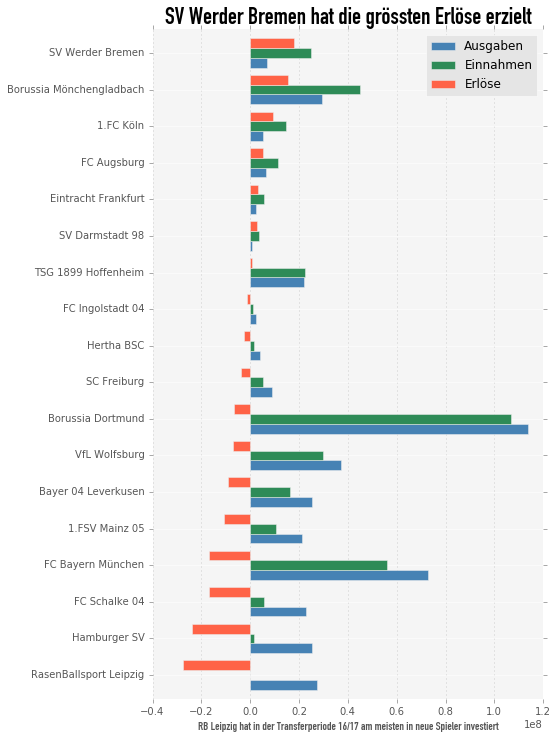

In [13]:
fig, ax = plt.subplots(figsize =(7,12))

#Font
csfont = {'fontname':'DIN Condensed'}

df_bundesliga_markt.sort_values('Erlöse').plot(kind='barh', ax = ax, legend=True, color=['SteelBlue', 'SeaGreen', 'Tomato'], width=.8)
plt.axes

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('RB Leipzig hat in der Transferperiode 16/17 am meisten in neue Spieler investiert', **csfont, fontsize=12)
ax.set_title("SV Werder Bremen hat die grössten Erlöse erzielt", **csfont, fontsize=24)

#Showing Median
#median = Transferbilanz['Vorlagen-Differenz'].median()
#ax.plot([median, median], [-4, 10], c='black', linestyle=':')
#ax.annotate(s='Durchschnitt aller Vereine', xy=(-110,3), color='black')

ax.set_axisbelow(True)

plt.savefig('Bundesliga_Transfer_Bilanz.pdf', transparent=True, bbox_inches='tight')
plt.savefig('Bundesliga_Transfer_Bilanz.png', transparent=True, bbox_inches='tight')